### AST

In [1]:
import sys
sys.path.append('./utils/')
from dfg_ast_utils import *
from extract_function_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
program_json_dict, program_id_lang_dic = read_program_tok_file()
pids_dict, programs_dict, programs_toked_dict, programs_detoked_dict = get_all_programs_detok_from_cache(
                                                                                    program_id_lang_dic,
                                                                                    pids_dict_path, 
                                                                                    programs_dict_path, 
                                                                                    programs_toked_dict_path,
                                                                                    programs_detoked_dict_path)

In [3]:
# get all the data in json format
jsons = get_all_data("program")

In [ ]:
# get all the non-terminals in the tree from training data
term_dict, sub_term_dict = get_all_terms(jsons, 'train')

In [ ]:
# get all the non-terminal tokens
for lang in langs:
    t_dict = term_dict[lang]
    sub_t_dict = sub_term_dict[lang]
    print(lang, len(t_dict), len(sub_t_dict))
    sorted_t_dict = sorted(sub_t_dict, key=sub_t_dict.get, reverse=True)
    print(sorted_t_dict)

In [70]:
lang1 = 'C'
code1 = programs_dict[lang1][155]
root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = pipeline(code1, ast_parsers[lang1], lang1)
show_graph(root1, graph1)

In [4]:
lang1 = "Python"
lang2 = 'Java'
tag = 'test'
key = 5
# code = jsons[('desc', lang)][tag][str(key)]

# Get programs
code1 = jsons[(lang2, lang1)][tag][str(key)]
code2 = jsons[(lang1, lang2)][tag][str(key)]

root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = pipeline(code1, ast_parsers[lang1], lang1)
# root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = refine_graphs(root1, graph_pruned_sibs1)
ast_seq1 = get_ast_seq_bfs(root1, graph_pruned_sibs1)
code1_recon = ast_seq_to_code(ast_seq1, lang1)

ast_seq1_subsep = get_ast_seq_bfs_subsep(root1, graph_pruned_sibs1)
new_ast_seq1 = code_seq_remove_subseq(ast_seq1_subsep)
new_code1_recon = ast_seq_to_code(new_ast_seq1, lang1)

In [5]:
root_node1 = get_ast(code1, ast_parsers[lang1])
root1, graph1 = get_graph(code1, root_node1, lang1)


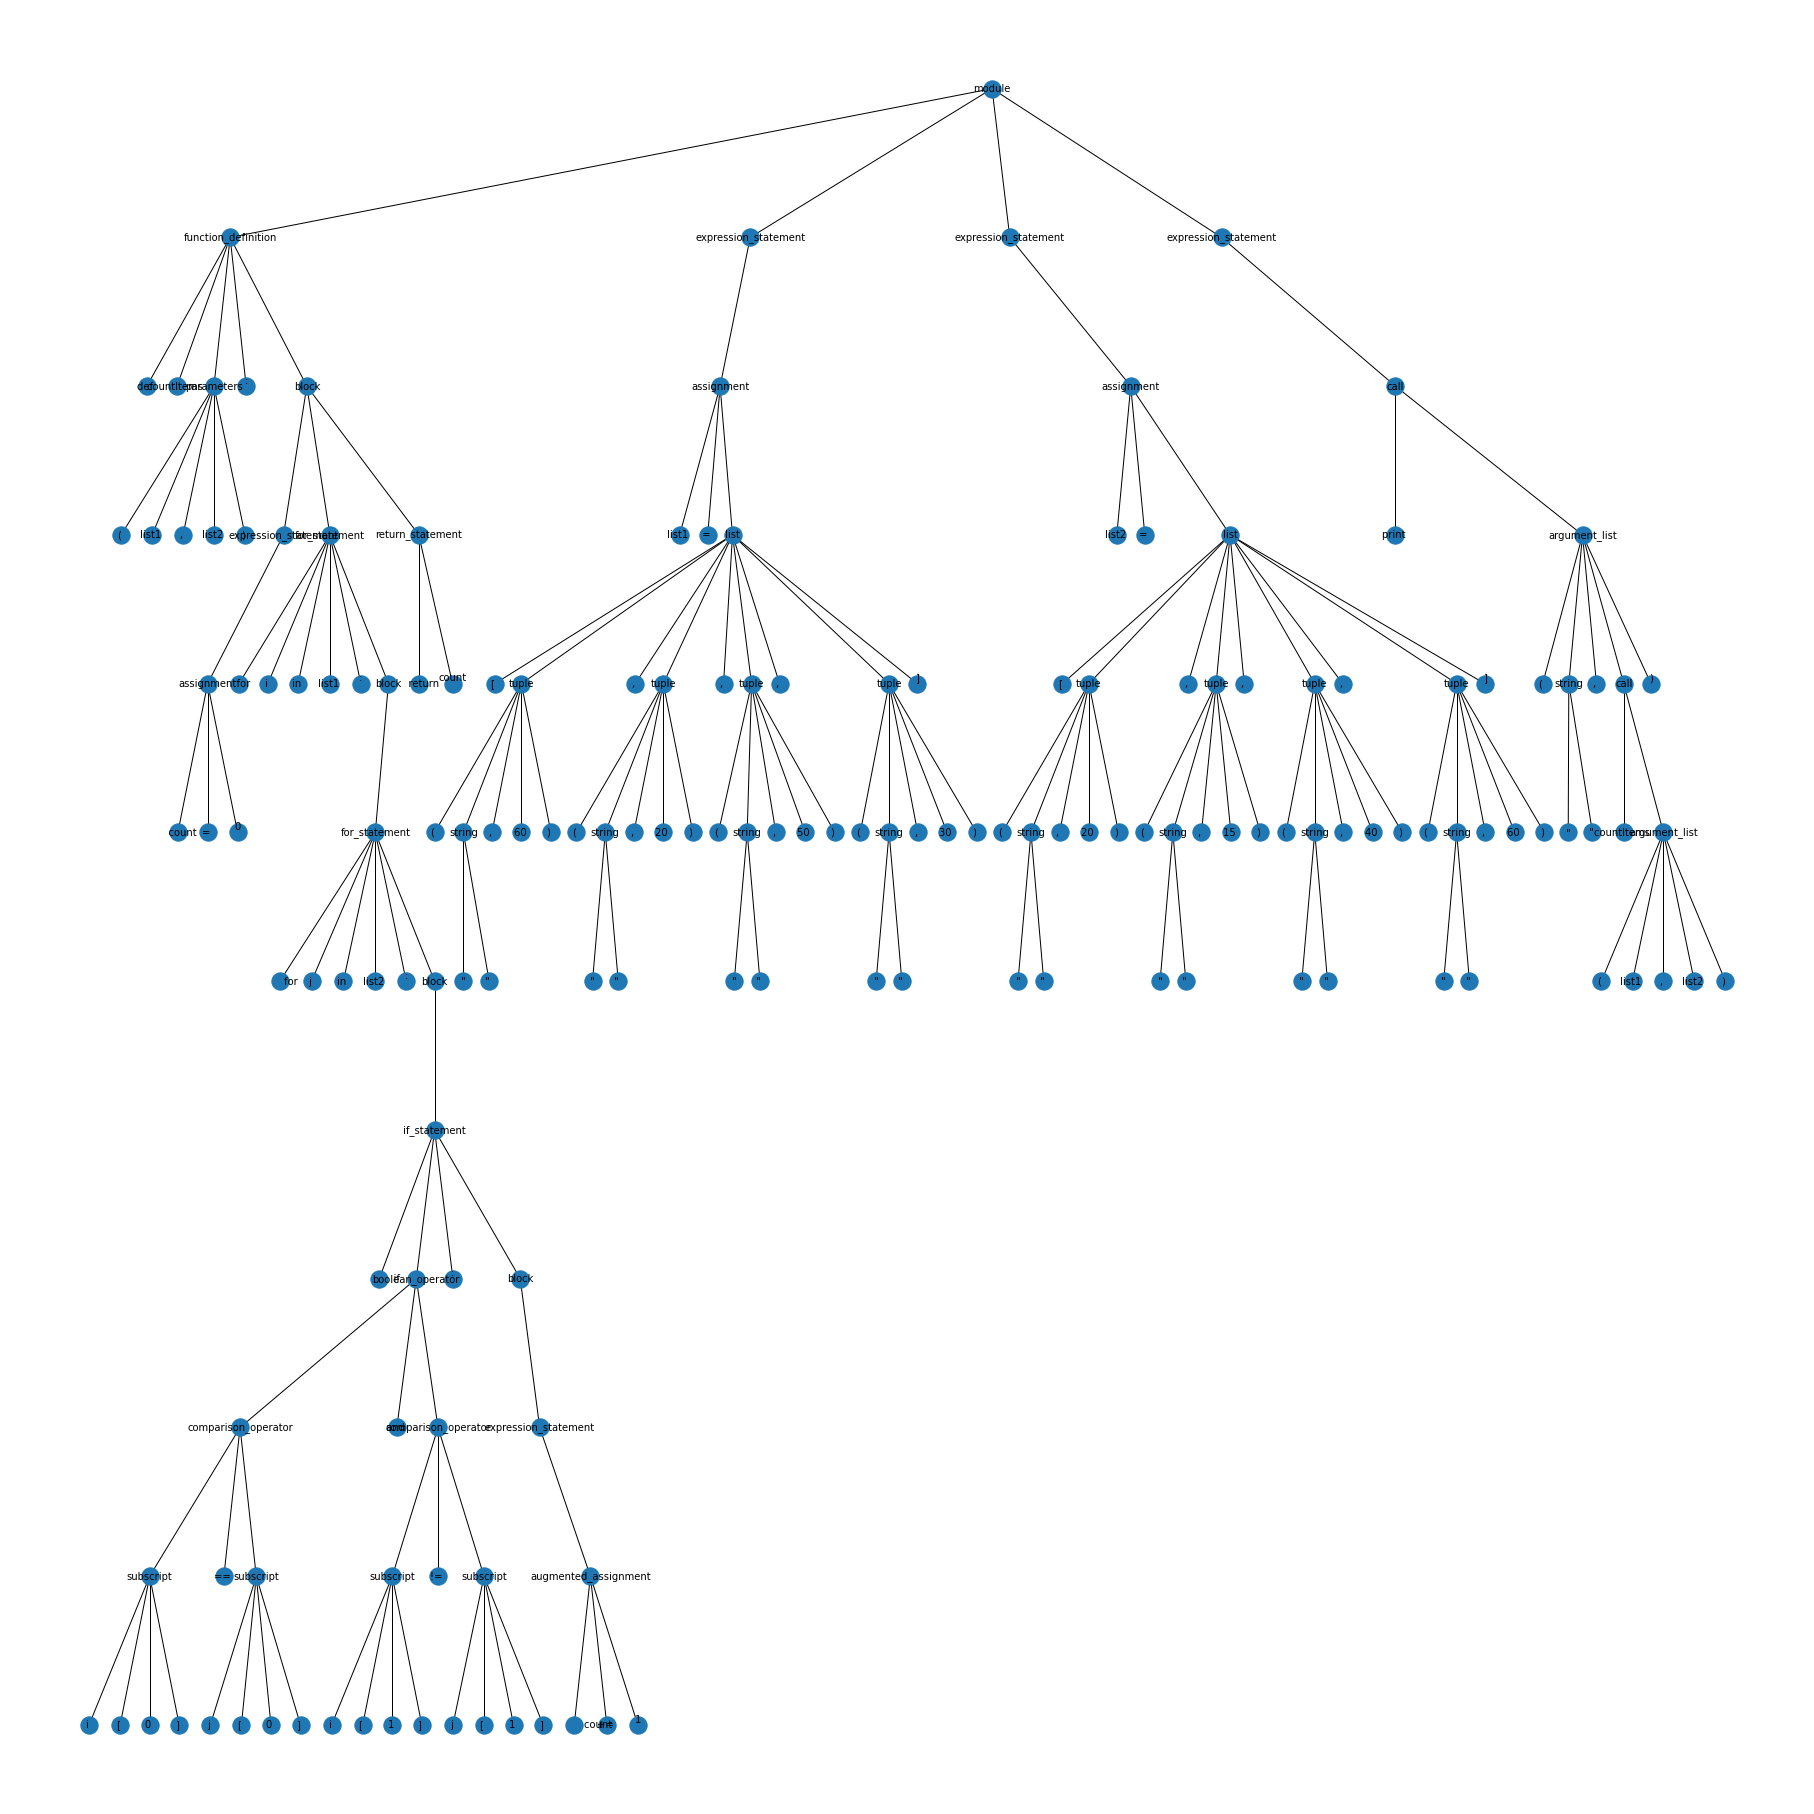

In [6]:
show_graph(root1, graph1)

In [7]:
show_comparison(code1, new_code1_recon)
e_dis, edits = edit_distance(code1, new_code1_recon)
print(e_dis, edits)

def countItems ( list1 , list2 ) :       | def countItems ( list1 , list2 ) :       | 
count = 0 for i in list1 : for j in      | count = 0 for i in list1 : for j in      | 
list2 : if i [ 0 ] == j [ 0 ] and i [ 1  | list2 : if i [ 0 ] == j [ 0 ] and i [ 1  | 
] != j [ 1 ] : count += 1 return count   | ] != j [ 1 ] : count += 1 return count   | 
list1 = [ ( "apple" , 60 ) , ( "bread"   | list1 = [ ( "apple" , 60 ) , ( "bread"   | 
, 20 ) , ( "wheat" , 50 ) , ( "oil" ,    | , 20 ) , ( "wheat" , 50 ) , ( "oil" ,    | 
30 ) ] list2 = [ ( "milk" , 20 ) , (     | 30 ) ] list2 = [ ( "milk" , 20 ) , (     | 
"bread" , 15 ) , ( "wheat" , 40 ) , (    | "bread" , 15 ) , ( "wheat" , 40 ) , (    | 
"apple" , 60 ) ] print ( "Count = " ,    | "apple" , 60 ) ] print ( "Count = " ,    | 
countItems ( list1 , list2 ) )           | countItems ( list1 , list2 ) )           | 
1 [('insert', 418, 418, 418, 419)]


In [ ]:
#TODO
# all the programs should be standardized first. Especially python, the indentation should be consistant.
# Right now I'm not using the original format of the xlcost programs.
# I should test the detok performance first. 

# TODO
# 应该把所有的non-terminal token加入vocab （但是model不认识它们。。）
# 对indent/dedent应该特殊处理
# Scale up. 验证整个Pipeline的正确性。最好是接上compilation和testing。

## Pipeline of AST Transformation

### Get programs

In [131]:
lang1 = "Python"
lang2 = 'Java'
tag = 'test'
key = 0
# code = jsons[('desc', lang)][tag][str(key)]
# root, graph, graph_pruned, graph_sibs, graph_pruned_sibs = pipeline(code1, ast_parsers[lang1])
# parsed_code = tree_to_code(root, graph_pruned, lang)

# Get programs
code1 = jsons[(lang2, lang1)][tag][str(key)]
code2 = jsons[(lang1, lang2)][tag][str(key)]

### Get AST Head

In [132]:
root_node1 = get_ast(code1, ast_parsers[lang1])

### Get AST Graph

In [133]:
root1, graph1 = get_graph(code1, root_node1, lang1)

#### Get Various AST Graphs

graph1 is original graph <br> 
graph_pruned1 is flatten subtrees that has depth < 3 <br> 
graph_sibs1 is to merge leaf siblings at the same level <br> 
graph_pruned_sibs1 is a combination of both <br> 

In [134]:
root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = pipeline(code1, ast_parsers[lang1], lang1)

In [135]:
# This process can be repeated to get the desired tree height
root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = refine_graphs(root1, graph_pruned_sibs1)

#### Show AST Graph

In [ ]:
show_graph(root1, graph_pruned_sibs1)

#### Construct the Code Sequence from the AST Graph

In [12]:
parsed_code1 = tree_to_code(root1, graph_pruned1, lang1)
# parsed_code2 = tree_to_code(root2, graph_pruned2, lang2)

#### Compare with the Original Code Sequence

In [ ]:
show_comparison(code1, parsed_code1)
e_dis, edits = edit_distance(code1, parsed_code1)
print(e_dis, edits)

### Flatten AST to a Sequence

#### Method 1: Traverse the tree in BFS manner, add parent id to each node to maintain edges.

In [190]:
ast_seq1 = get_ast_seq_bfs(root1, graph1)
# code_seq2 = get_ast_seq_bfs(root2, graph_pruned_sibs2)


#### Method 2: Use SUBSEP token to maintain edges.

In [ ]:
ast_seq1_subsep = get_ast_seq_bfs_subsep(root1, graph1)

### Convert the Flattened AST back to Code Sequence

#### (Only for method 2) Convert SUBSEP to parent id

In [ ]:
ast_seq1 = code_seq_remove_subseq(ast_seq1_subsep)

#### Reconstruct AST from the Flattened AST

In [ ]:
root1_recon, graph1_recon = ast_seq_to_ast(ast_seq1)

#### Convert the reconstructed AST to Original Code Sequence

In [ ]:
code1_recon = tree_to_code(root1_recon, graph1_recon, lang1)

#### Merge the Two Steps

In [ ]:
code1_recon = ast_seq_to_code(ast_seq1, lang1)
# code2_recon = ast_seq_to_code(code_seq2, lang2)

#### Compare with the Original Code Sequence

In [ ]:
show_comparison(code1, code1_recon)
e_dis, edits = edit_distance(code1, code1_recon)

### Test the pipeline

#### Test with the same program (without the model)

In [ ]:
# iterate through the programs in different languages
# save the hypothesis in correct format, use for compilation and test later

In [146]:
def ast_back_conversion(lang1, lang2, tag):
    keys = list(jsons[(lang2, lang1)][tag].keys())
    edit_dict = {}
    failed_keys = []
    for key in tqdm(keys):
        # Get programs
        code1 = jsons[(lang2, lang1)][tag][str(key)]
        if code1 == "":
            failed_keys.append(key)
            continue
        root1, graph1, graph_pruned1, graph_sibs1, graph_pruned_sibs1 = pipeline(code1, ast_parsers[lang1], lang1)
        ast_seq1_subsep = get_ast_seq_bfs_subsep(root1, graph_pruned_sibs1)
        new_ast_seq1 = code_seq_remove_subseq(ast_seq1_subsep)
        new_code1_recon = ast_seq_to_code(new_ast_seq1, lang1)
        e_dis, edits = edit_distance(code1, new_code1_recon)
        edit_dict[key] = (e_dis, edits, code1, new_code1_recon)
    return edit_dict

def inspect_edits(edit_dict, key):
    e_dis, edits, c1, cr1 = edit_dict[key]
    for edit in edits:
        # https://docs.python.org/3/library/difflib.html#difflib.SequenceMatcher.get_opcodes
        op_code, i1, i2, j1, j2 = edit
        print(op_code)
        if i1 != i2:
            print("c1", i1, i2, len(c1), repr(c1[i1:i2]))
            
        if j1 != j2:
            print("c2", j1, j2, len(cr1), repr(cr1[j1:j2]))
    return

def print_edits(edit_dict, thres=2):
    count = 0
    for k, (e_dis, edits, c1, cr1) in edit_dict.items():
        if e_dis > thres:
            count += 1
            print(e_dis, k)
            inspect_edits(edit_dict, k)
    print(count/len(edit_dict))
    return

# Tried java, c++, python on test data. All have good conversion rate. 
# Some bad cases are due to failed AST parsing.
# java test 138
# c++ test 50
lang1 = "C++" # lang1 is the target language
lang2 = 'Java'
tag = 'test'
edit_dict = ast_back_conversion(lang1, lang2, tag)
print_edits(edit_dict, thres=1)

100%|██████████| 792/792 [00:22<00:00, 34.65it/s]


#### Test with the model

In [ ]:
# Separate function from program
# Add generative model here
# Add sampling methods (control temperature)
# Select input programs
# Get generated samples
# Test the pipeline

In [2]:
cs_code = "using System;using System.Linq;namespace AOJ{class Program{public static void Main(string[] args){foreach(var i in Enumerable.Range(1, 9)){foreach(var j in Enumerable.Range(1, 9)){Console.WriteLine('{0}x{1}={2}', i, j, i*j);}}}}}"
cpp_code = "#include<iostream>using namespace std;int main(){cin.tie(0);ios::sync_with_stdio(false);for(int i=1;i<10;i++)for(int j=1;j<10;j++)cout << i << 'x' << j << '='' << i*j << '\n';}"
java_code = "class Main {public static void main(String[] args){for(int i = 1; i < 10; ++i){for(int j = 1; j < 10; ++j){System.out.println(Integer.toString(i)+'x'+Integer.toString(j)+'='+Integer.toString(i*j));}}}} "
python_code = """for i in range(1, n):\n\tcounter = 1\n\twhile ((i - counter) >= 0 and\n\t\tA[i] >= A[i - counter]):\n\t\tcounter += ans[i - counter]\n\tans[i] = counter"""
js_code = "prefix[0] = prefix[1] = 0;for (let p = 2; p <= MAX; p++) {prefix[p] = prefix[p - 1];if (prime[p])prefix[p]++;}}"
php_code = "for ($p = 2; $p <= $MAX; $p++){$prefix[$p] = $prefix[$p - 1];if ($prime[$p])$prefix[$p]++;}}"
c_code = """void print(struct Node *root){if (root != NULL){print(root->left);printf("%d ",root->data);print(root->right);}}"""

In [ ]:
print(dir(java_root_node))

In [11]:
for lang in ['java', 'cpp', 'py', 'cs', 'js', 'php', 'c']:
#     print(lang + "_edge_list, " + lang + "_labels = get_graph_data_new(" 
#           + lang + "_root, " + lang + "_graph_pruned_sibs)")
    print("edge_list, labels = " + lang + "_edge_list, " + lang + "_labels")

edge_list, labels = java_edge_list, java_labels
edge_list, labels = cpp_edge_list, cpp_labels
edge_list, labels = py_edge_list, py_labels
edge_list, labels = cs_edge_list, cs_labels
edge_list, labels = js_edge_list, js_labels
edge_list, labels = php_edge_list, php_labels
edge_list, labels = c_edge_list, c_labels


### javalang

In [1]:
import javalang
tree = javalang.parse.parse("""class Main {
  static void printNGE ( int arr [ ] , int n ) {
    int next , i , j ;
    for ( i = 0 ; i < n ; i ++ ) {
      next = - 1 ;
      for ( j = i + 1 ; j < n ; j ++ ) {
        if ( arr [ i ] < arr [ j ] ) {
          next = arr [ j ] ;
          break ;
        }
      }
      System . out . println ( arr [ i ] + " -- " + next ) ;
    }
  }
  public static void main ( String args [ ] ) {
    int arr [ ] = {
      11 , 13 , 21 , 3 };
      int n = arr . length ;
      printNGE ( arr , n ) ;
    }
  }""")

In [ ]:
exp = javalang.parse.parse_member_signature("""next = arr [ j ] ;""")
# parse_member_signature
# parse_expression
print(exp)

In [ ]:
def print_dict(node):
    for k, v in node.__dict__.items():
        print(k, v)
        for item in v:
            print(item)
    return

root = tree.types[0]
node_stack = []
sub_tree_sexp_list = []
depth = 1
node_stack.append([root, depth])
while len(node_stack) != 0:
    cur_node, cur_depth = node_stack.pop()
    print(type(cur_node), cur_node.name, cur_depth)
    sub_tree_sexp_list.append([cur_node.name, cur_depth])
    if "body" not in cur_node.__dict__.keys():
        print("++++++++++++++")
        print("no body", type(cur_node), cur_node.name, cur_depth)
        print_dict(cur_node)
        continue
    for child_node in cur_node.body:
        if "body" not in child_node.__dict__.keys():
            print("---------------")
            print("chile no body", type(child_node))
            print_dict(child_node)
            continue
        depth = cur_depth + 1
        node_stack.append([child_node, depth])
sub_tree_sexp_list    

In [ ]:
tree.types[0].__dict__.keys()